In [618]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [619]:
data = pd.read_csv('nyc-rolling-sales.csv')

In [620]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [621]:
data.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [622]:
data.drop(columns=['Unnamed: 0', 'EASE-MENT'],inplace=True)

In [623]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [624]:
report = pp.ProfileReport(data, title="House Data Assessment")

In [625]:
report

In [626]:
report.to_file("Data Assessment.html")

In [627]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET',
       'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE',
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [628]:
data.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING_CLASS_CATEGORY           object
TAX_CLASS_AT_PRESENT              object
BLOCK                              int64
LOT                                int64
BUILDING_CLASS_AT_PRESENT         object
ADDRESS                           object
APARTMENT_NUMBER                  object
ZIP_CODE                           int64
RESIDENTIAL_UNITS                  int64
COMMERCIAL_UNITS                   int64
TOTAL_UNITS                        int64
LAND_SQUARE_FEET                  object
GROSS_SQUARE_FEET                 object
YEAR_BUILT                         int64
TAX_CLASS_AT_TIME_OF_SALE          int64
BUILDING_CLASS_AT_TIME_OF_SALE    object
SALE_PRICE                        object
SALE_DATE                         object
dtype: object

In [629]:
data['SALE_PRICE'] = pd.to_numeric(data['SALE_PRICE'],errors='coerce')

In [630]:
data['LAND_SQUARE_FEET'] = pd.to_numeric(data['LAND_SQUARE_FEET'],errors='coerce')

In [631]:
data['GROSS_SQUARE_FEET'] = pd.to_numeric(data['GROSS_SQUARE_FEET'],errors='coerce')

In [632]:
data['SALE_DATE']=pd.to_datetime(data['SALE_DATE'], errors='coerce')

In [633]:
data['BOROUGH'] = data['BOROUGH'].astype('category')

In [634]:
data['ZIP_CODE'] = data['ZIP_CODE'].astype('category')

In [635]:
data['TAX_CLASS_AT_TIME_OF_SALE'] = data['TAX_CLASS_AT_TIME_OF_SALE'].astype('category')

In [636]:
data['BUILDING_CLASS_AT_PRESENT'] = data['BUILDING_CLASS_AT_PRESENT'].astype('category')

In [637]:
data['ADDRESS'] = data['ADDRESS'].astype('category')

In [638]:
data['APARTMENT_NUMBER'] = data['APARTMENT_NUMBER'].astype('category')

In [639]:
data['BUILDING_CLASS_AT_TIME_OF_SALE'] = data['BUILDING_CLASS_AT_TIME_OF_SALE'].astype('category')

In [640]:
data['NEIGHBORHOOD'] = data['NEIGHBORHOOD'].astype('category')

In [641]:
data['BUILDING_CLASS_CATEGORY'] = data['BUILDING_CLASS_CATEGORY'].astype('category')

In [642]:
data['TAX_CLASS_AT_PRESENT'] = data['TAX_CLASS_AT_PRESENT'].astype('category')

In [643]:
data.dtypes

BOROUGH                                 category
NEIGHBORHOOD                            category
BUILDING_CLASS_CATEGORY                 category
TAX_CLASS_AT_PRESENT                    category
BLOCK                                      int64
LOT                                        int64
BUILDING_CLASS_AT_PRESENT               category
ADDRESS                                 category
APARTMENT_NUMBER                        category
ZIP_CODE                                category
RESIDENTIAL_UNITS                          int64
COMMERCIAL_UNITS                           int64
TOTAL_UNITS                                int64
LAND_SQUARE_FEET                         float64
GROSS_SQUARE_FEET                        float64
YEAR_BUILT                                 int64
TAX_CLASS_AT_TIME_OF_SALE               category
BUILDING_CLASS_AT_TIME_OF_SALE          category
SALE_PRICE                               float64
SALE_DATE                         datetime64[ns]
dtype: object

In [644]:
sum(data.duplicated(data.columns))

765

In [645]:
data=data.drop_duplicates(data.columns, keep='last')

In [646]:
sum(data.duplicated(data.columns))

0

In [647]:
missing_data = data.isnull()

In [648]:
missing_data

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
84544,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
84545,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
84546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [649]:
data.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING_CLASS_CATEGORY               0
TAX_CLASS_AT_PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING_CLASS_AT_PRESENT             0
ADDRESS                               0
APARTMENT_NUMBER                      0
ZIP_CODE                              0
RESIDENTIAL_UNITS                     0
COMMERCIAL_UNITS                      0
TOTAL_UNITS                           0
LAND_SQUARE_FEET                  26054
GROSS_SQUARE_FEET                 27385
YEAR_BUILT                            0
TAX_CLASS_AT_TIME_OF_SALE             0
BUILDING_CLASS_AT_TIME_OF_SALE        0
SALE_PRICE                        14176
SALE_DATE                             0
dtype: int64

In [650]:
data['SALE_PRICE'].head()

0    6625000.0
1          NaN
2          NaN
3    3936272.0
4    8000000.0
Name: SALE_PRICE, dtype: float64

In [651]:
data['SALE_PRICE'].fillna(data['SALE_PRICE'].median(),inplace=True)

In [652]:
data["SALE_PRICE"].head()

0    6625000.0
1     533000.0
2     533000.0
3    3936272.0
4    8000000.0
Name: SALE_PRICE, dtype: float64

In [653]:
missing_data = data['SALE_PRICE'].isnull()

In [654]:
missing_data

0        False
1        False
2        False
3        False
4        False
         ...  
84543    False
84544    False
84545    False
84546    False
84547    False
Name: SALE_PRICE, Length: 83783, dtype: bool

In [655]:
data['LAND_SQUARE_FEET'].fillna(data['LAND_SQUARE_FEET'].median(),inplace=True)

In [656]:
missing_data = data['LAND_SQUARE_FEET'].isnull()

In [657]:
missing_data

0        False
1        False
2        False
3        False
4        False
         ...  
84543    False
84544    False
84545    False
84546    False
84547    False
Name: LAND_SQUARE_FEET, Length: 83783, dtype: bool

In [658]:
data['LAND_SQUARE_FEET'].isnull().sum()

0

In [659]:
data['GROSS_SQUARE_FEET'].fillna(data['GROSS_SQUARE_FEET'].median(),inplace=True)

In [660]:
data['GROSS_SQUARE_FEET'].isnull().sum()

0

In [661]:
data.describe()

,BLOCK,LOT,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,8.378300e+04,8.378300e+04,83783.000000,8.378300e+04
mean,4242.903155,376.137415,1.999976,0.183677,2.213504,3.375438e+03,3.170620e+03,1789.814318,1.154192e+06
std,3568.789482,658.021286,16.569118,8.576582,18.777727,3.449485e+04,2.860114e+04,536.565051,1.042234e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1326.000000,22.000000,0.000000,0.000000,1.000000,2.000000e+03,1.344000e+03,1920.000000,3.000000e+05
50%,3319.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,1940.000000,5.330000e+05
75%,6295.000000,1001.000000,2.000000,0.000000,2.000000,2.650000e+03,2.080000e+03,1965.000000,8.350000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


In [662]:
data.corr()

,BLOCK,LOT,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
BLOCK,1.000000,-0.229281,-0.015125,-0.002646,-0.015033,0.007270,-0.023428,0.070965,-0.054385
LOT,-0.229281,1.000000,-0.033839,-0.010553,-0.032603,-0.022076,-0.026484,-0.290821,0.011053
RESIDENTIAL_UNITS,-0.015125,-0.033839,1.000000,0.016257,0.889602,0.406281,0.694166,0.025165,0.095796
COMMERCIAL_UNITS,-0.002646,-0.010553,0.016257,1.000000,0.471040,0.036251,0.063099,0.006100,0.042432
TOTAL_UNITS,-0.015033,-0.032603,0.889602,0.471040,1.000000,0.374961,0.641217,0.024215,0.103877
LAND_SQUARE_FEET,0.007270,-0.022076,0.406281,0.036251,0.374961,1.000000,0.526906,-0.014212,0.052051
GROSS_SQUARE_FEET,-0.023428,-0.026484,0.694166,0.063099,0.641217,0.526906,1.000000,0.022436,0.346081
YEAR_BUILT,0.070965,-0.290821,0.025165,0.006100,0.024215,-0.014212,0.022436,1.000000,-0.002159
SALE_PRICE,-0.054385,0.011053,0.095796,0.042432,0.103877,0.052051,0.346081,-0.002159,1.000000


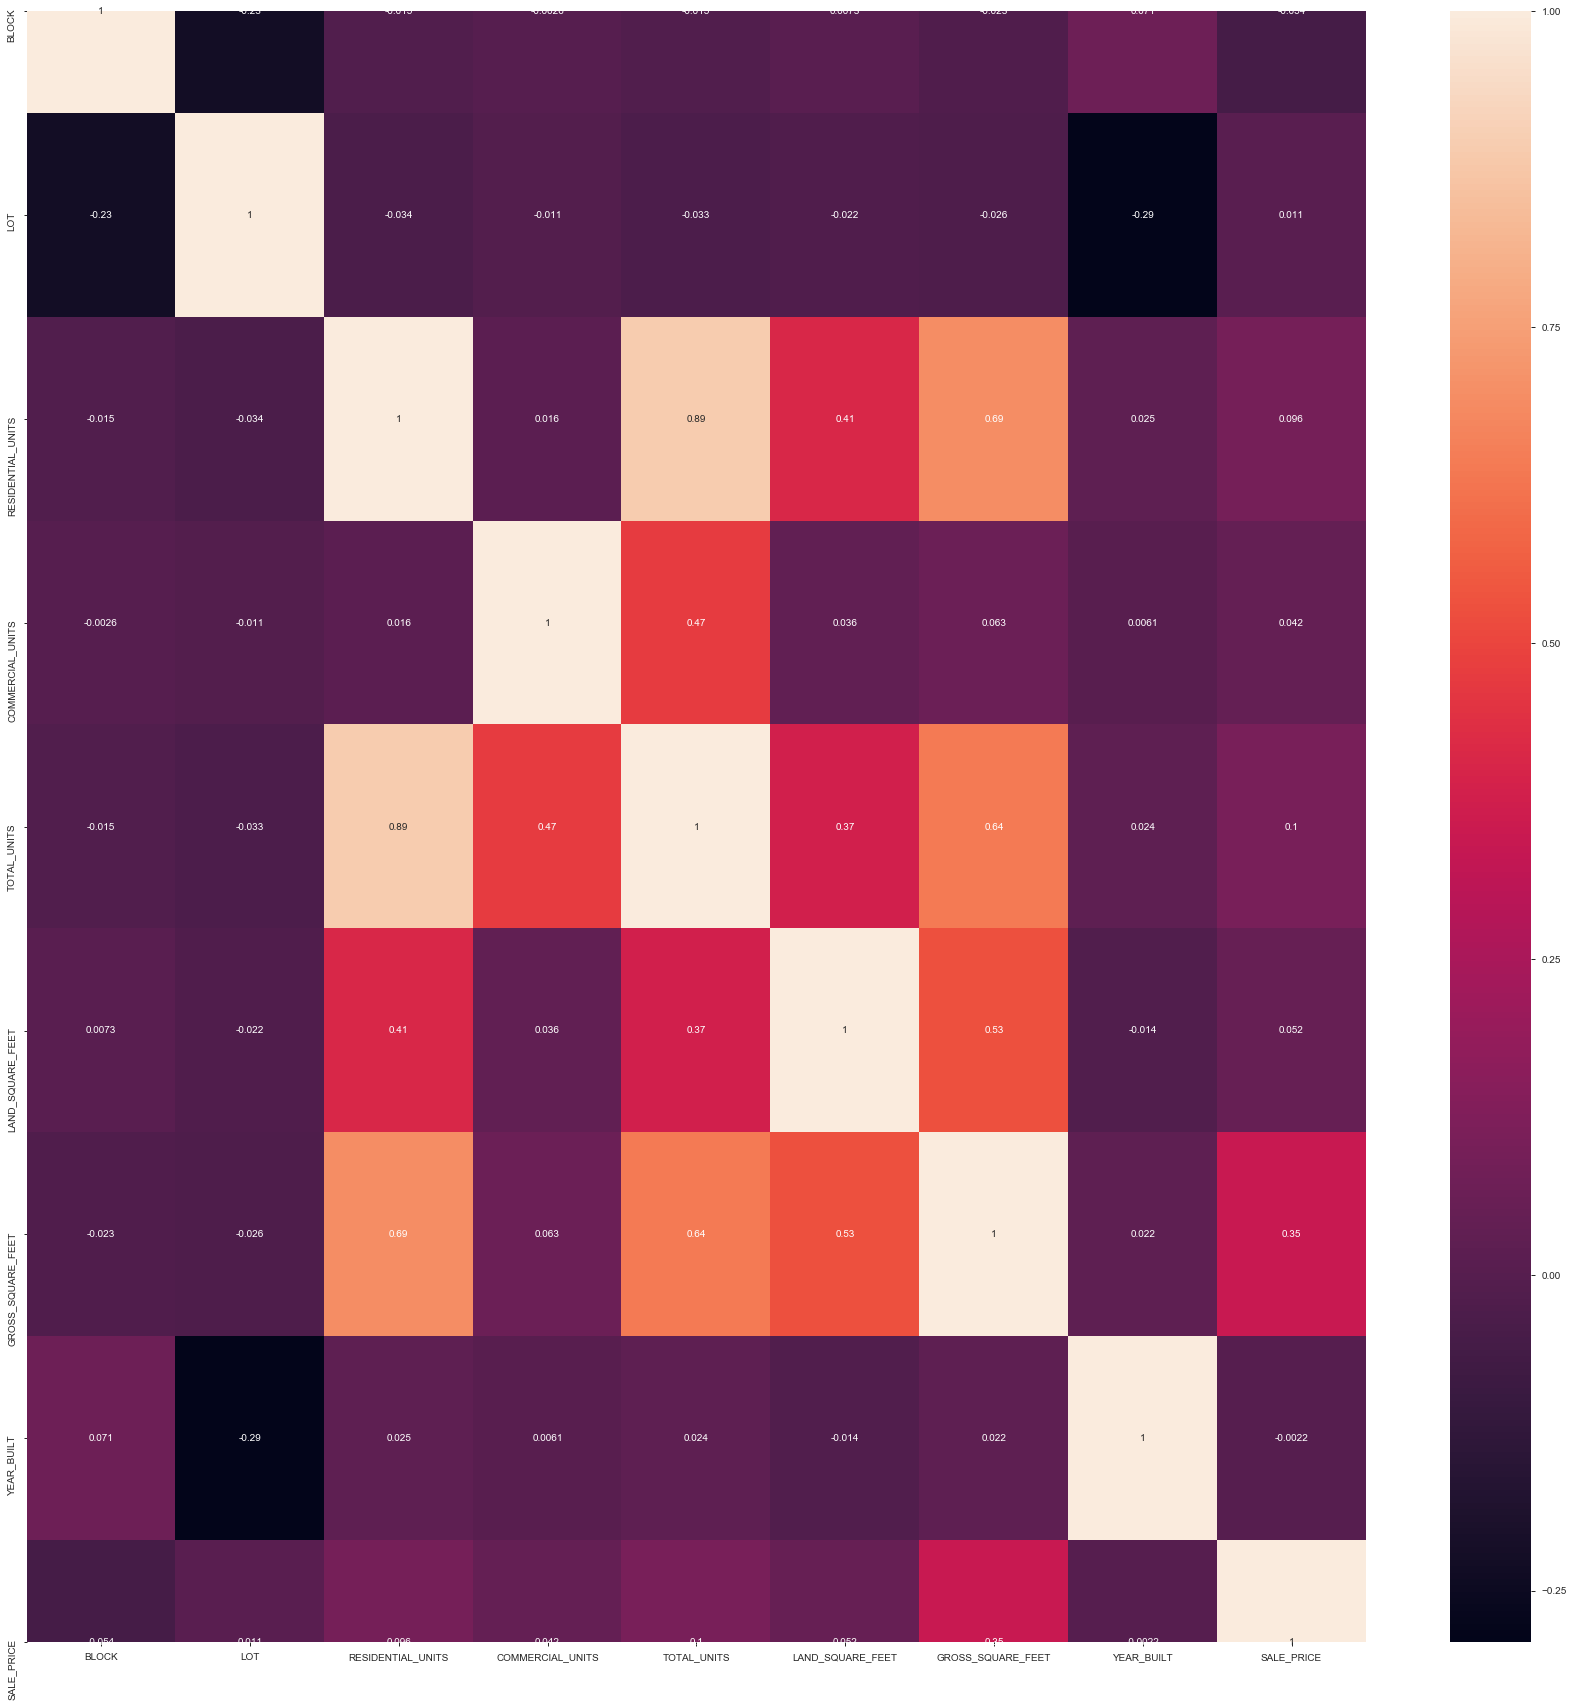

In [663]:
plt.figure(figsize = (30,30))
sns.heatmap(data.corr(),annot=True)

In [664]:
data.describe()

,BLOCK,LOT,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,8.378300e+04,8.378300e+04,83783.000000,8.378300e+04
mean,4242.903155,376.137415,1.999976,0.183677,2.213504,3.375438e+03,3.170620e+03,1789.814318,1.154192e+06
std,3568.789482,658.021286,16.569118,8.576582,18.777727,3.449485e+04,2.860114e+04,536.565051,1.042234e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1326.000000,22.000000,0.000000,0.000000,1.000000,2.000000e+03,1.344000e+03,1920.000000,3.000000e+05
50%,3319.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,1940.000000,5.330000e+05
75%,6295.000000,1001.000000,2.000000,0.000000,2.000000,2.650000e+03,2.080000e+03,1965.000000,8.350000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


In [707]:
Borough_dummies = pd.get_dummies(data['BOROUGH']).rename(columns=lambda x: 'BOROUGH_' + str(x))

In [708]:
TAX_CLASS_AT_TIME_OF_SALE_dummies = pd.get_dummies(data['TAX_CLASS_AT_TIME_OF_SALE']).rename(columns=lambda x: 'TAX CLASS AT TIME OF SALE_' + str(x))

In [709]:
data = pd.concat([data, Borough_dummies,TAX_CLASS_AT_TIME_OF_SALE_dummies], axis=1)

In [710]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET',
       'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE',
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE',
       'BOROUGH_1', 'BOROUGH_2', 'BOROUGH_3', 'BOROUGH_4', 'BOROUGH_5',
       'TAX CLASS AT TIME OF SALE_1', 'TAX CLASS AT TIME OF SALE_2',
       'TAX CLASS AT TIME OF SALE_3', 'TAX CLASS AT TIME OF SALE_4'],
      dtype='object')

In [711]:
data.describe()

,BLOCK,LOT,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,TAX CLASS AT TIME OF SALE_1,TAX CLASS AT TIME OF SALE_2,TAX CLASS AT TIME OF SALE_3,TAX CLASS AT TIME OF SALE_4
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,8.378300e+04,8.378300e+04,83783.000000,8.378300e+04,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000
mean,4242.903155,376.137415,1.999976,0.183677,2.213504,3.375438e+03,3.170620e+03,1789.814318,1.154192e+06,0.216058,0.083478,0.284580,0.316866,0.099018,0.491735,0.435363,0.000036,0.072867
std,3568.789482,658.021286,16.569118,8.576582,18.777727,3.449485e+04,2.860114e+04,536.565051,1.042234e+07,0.411557,0.276604,0.451217,0.465258,0.298688,0.499935,0.495807,0.005984,0.259919
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1326.000000,22.000000,0.000000,0.000000,1.000000,2.000000e+03,1.344000e+03,1920.000000,3.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3319.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,1940.000000,5.330000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6295.000000,1001.000000,2.000000,0.000000,2.000000,2.650000e+03,2.080000e+03,1965.000000,8.350000e+05,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [712]:
P = np.percentile(data.SALE_PRICE, [5, 95])

In [713]:
data = data[(data.SALE_PRICE > P[0]) & (data.SALE_PRICE < P[1])]

In [714]:
data.describe()

,BLOCK,LOT,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,TAX CLASS AT TIME OF SALE_1,TAX CLASS AT TIME OF SALE_2,TAX CLASS AT TIME OF SALE_3,TAX CLASS AT TIME OF SALE_4
count,69545.000000,69545.000000,69545.000000,69545.000000,69545.000000,6.954500e+04,6.954500e+04,69545.000000,6.954500e+04,69545.000000,69545.000000,69545.000000,69545.000000,69545.000000,69545.000000,69545.000000,69545.000000,69545.000000
mean,4378.270257,373.601826,1.527917,0.130951,1.683903,3.014084e+03,2.432006e+03,1800.368653,6.896037e+05,0.218247,0.071436,0.213272,0.378187,0.118858,0.500424,0.445165,0.000014,0.054396
std,3715.621009,657.733118,14.081915,9.025520,16.824741,2.729535e+04,2.563741e+04,522.245037,5.069124e+05,0.413059,0.257553,0.409621,0.484938,0.323624,0.500003,0.496988,0.003792,0.226800
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1334.000000,21.000000,0.000000,0.000000,0.000000,2.000000e+03,1.344000e+03,1920.000000,4.150000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3343.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,1941.000000,5.330000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6536.000000,685.000000,2.000000,0.000000,2.000000,2.642000e+03,1.874000e+03,1967.000000,8.150000e+05,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.999000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [715]:
from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.model_selection import train_test_split,cross_val_score # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric
from sklearn.feature_selection import RFECV # for Recursive Feature Elimination with Cross Validation
from sklearn import tree
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [750]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [751]:
import xgboost as xgb

In [716]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET',
       'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE',
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE',
       'BOROUGH_1', 'BOROUGH_2', 'BOROUGH_3', 'BOROUGH_4', 'BOROUGH_5',
       'TAX CLASS AT TIME OF SALE_1', 'TAX CLASS AT TIME OF SALE_2',
       'TAX CLASS AT TIME OF SALE_3', 'TAX CLASS AT TIME OF SALE_4'],
      dtype='object')

In [1039]:
X = data[['BLOCK', 'LOT','RESIDENTIAL_UNITS','COMMERCIAL_UNITS','GROSS_SQUARE_FEET', 'LAND_SQUARE_FEET','BOROUGH_1', 'BOROUGH_2', 'BOROUGH_3', 'BOROUGH_4', 'BOROUGH_5',
       'TAX CLASS AT TIME OF SALE_1', 'TAX CLASS AT TIME OF SALE_2','TAX CLASS AT TIME OF SALE_3', 'TAX CLASS AT TIME OF SALE_4']]

In [1040]:
y = data['SALE_PRICE']

In [1041]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [1042]:
model1 = LinearRegression()

In [1043]:
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1044]:
coefficient1 = model1.coef_

In [1045]:
intercept1 = model1.intercept_

In [1046]:
coefficient1

array([-2.82866498e+01,  6.28585709e+01,  5.90757918e+02,  5.15644554e+03,
       -9.59759295e-01,  7.45677674e-01,  2.81804526e+05, -2.28567461e+05,
        2.08820509e+05, -2.56447524e+04, -2.36412822e+05,  1.11823866e+05,
       -5.93829236e+04,  0.00000000e+00, -5.24409427e+04])

In [1047]:
intercept1

710159.5194917303

In [1048]:
y_pred = model1.predict(X_test)

In [1049]:
np.sqrt(mse(y_pred, y_test))

466976.5362396119

In [1050]:
coefficients_pd1 = pd.DataFrame((list(zip(X, model1.coef_))), columns = ['X', 'Coefficients'])
coefficients_pd1

,X,Coefficients
0,BLOCK,-28.286650
1,LOT,62.858571
2,RESIDENTIAL_UNITS,590.757918
3,COMMERCIAL_UNITS,5156.445543
4,GROSS_SQUARE_FEET,-0.959759
5,LAND_SQUARE_FEET,0.745678
6,BOROUGH_1,281804.526298
7,BOROUGH_2,-228567.460977
8,BOROUGH_3,208820.509149
9,BOROUGH_4,-25644.752412


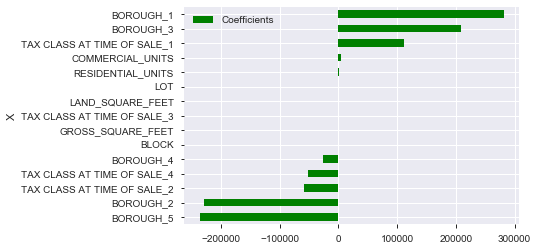

In [1051]:
coefficients_pd1.sort_values('Coefficients').set_index('X').plot(kind = 'barh', color = 'g')

In [1052]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

C:\Users\Cha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Cha\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [1053]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [1054]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [1055]:
xg_reg.fit(X_train,y_train)

[13:58:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [1056]:
preds = xg_reg.predict(X_test)

In [1057]:
rmse = np.sqrt(mse(y_test, preds))

In [1058]:
rmse

518627.93277948326